In [1]:
import glob
import re

import scipy.interpolate as interpolate
from matplotlib import pyplot as plt
import numpy as np

from utils import Graph

# Different pressure levels
P_v = [2]#, 7, 15]
N_v = [1.15e19]#, 4.02e19, 8.61e19]
colors = ['C0']#, 'C1', 'C2']
colors_th = ['C0--']#, 'C1--', 'C3--']

def log_interp1d(xx, yy, kind='linear'):
    logx = np.log10(xx)
    logy = np.log10(yy)
    lin_interp = interpolate.interp1d(logx, logy, kind=kind)
    log_interp = lambda zz: np.power(10.0, lin_interp(np.log10(zz)))
    return log_interp

In [2]:
PATH = '/Users/dcaratelli/Neutrinos/LArCADe/SimLArCADe/py/gas-vdrift/2PSI/v6/'

In [3]:
field_v = [10,30,50,100,300,500,1000,3000,5000,10000,30000,50000]
#field_v = [10,30,100,300,1000,3000,10000]

The below imports and processes the simulation runs. At each bulk field, $20$ simulations were run for $1$ $\mu$s at the three investigated pressures.

In [4]:
E_vals = [[], [], []]

v_vals = [[], [], []]
v_devs = [[], [], []]

eV_vals = [[], [], []]
eV_devs = [[], [], []]

for i, p in enumerate(P_v):
    file_tree = {}
    
    print ('here')

    #for file in glob.glob(f'{PATH}/*/*.txt'):
    for field in field_v:   
        
        print ('field is ',field)
    
        key = field #int(re.search(r'(\d*)(?:V)', file).group(1))
        
        THISPATH = f'{PATH}/{field}/'
        print (THISPATH)
        for file in glob.glob(f'{PATH}/{field}/*.txt'):
            #print ('found file ',file)
            if (key in file_tree):
                file_tree[key].append(file)
            else:
                file_tree[key] = [file]

    for key, value in sorted(file_tree.items()):
        group = Graph(value)

        E_vals[i].append(key)

        v_vals[i].append(group.drift_mean())
        v_devs[i].append(group.drift_std_dev())
        
        print ('drift vel : ',group.drift_mean())

        eV_vals[i].append(np.mean([np.mean(k) for k in group.ke]))
        eV_devs[i].append(np.std([np.mean(k) for k in group.ke], ddof=1))

here
field is  10
/Users/dcaratelli/Neutrinos/LArCADe/SimLArCADe/py/gas-vdrift/2PSI/v6//10/
field is  30
/Users/dcaratelli/Neutrinos/LArCADe/SimLArCADe/py/gas-vdrift/2PSI/v6//30/
field is  50
/Users/dcaratelli/Neutrinos/LArCADe/SimLArCADe/py/gas-vdrift/2PSI/v6//50/
field is  100
/Users/dcaratelli/Neutrinos/LArCADe/SimLArCADe/py/gas-vdrift/2PSI/v6//100/
field is  300
/Users/dcaratelli/Neutrinos/LArCADe/SimLArCADe/py/gas-vdrift/2PSI/v6//300/
field is  500
/Users/dcaratelli/Neutrinos/LArCADe/SimLArCADe/py/gas-vdrift/2PSI/v6//500/
field is  1000
/Users/dcaratelli/Neutrinos/LArCADe/SimLArCADe/py/gas-vdrift/2PSI/v6//1000/
field is  3000
/Users/dcaratelli/Neutrinos/LArCADe/SimLArCADe/py/gas-vdrift/2PSI/v6//3000/
field is  5000
/Users/dcaratelli/Neutrinos/LArCADe/SimLArCADe/py/gas-vdrift/2PSI/v6//5000/
field is  10000
/Users/dcaratelli/Neutrinos/LArCADe/SimLArCADe/py/gas-vdrift/2PSI/v6//10000/
field is  30000
/Users/dcaratelli/Neutrinos/LArCADe/SimLArCADe/py/gas-vdrift/2PSI/v6//30000/
field is

10


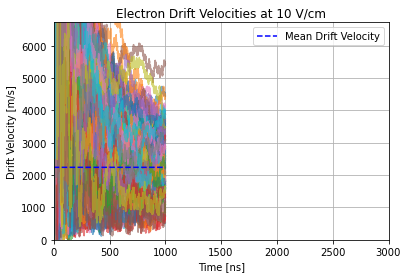

30


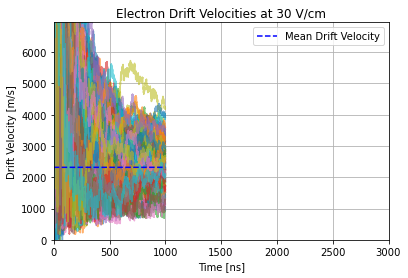

50


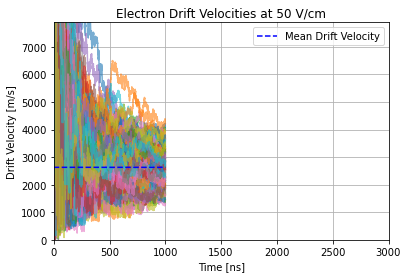

100


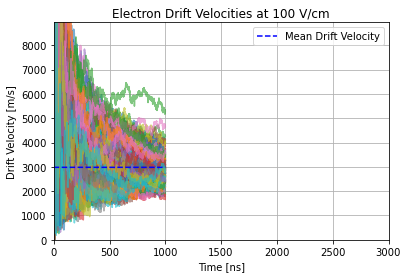

300


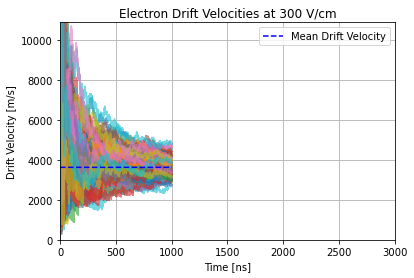

500


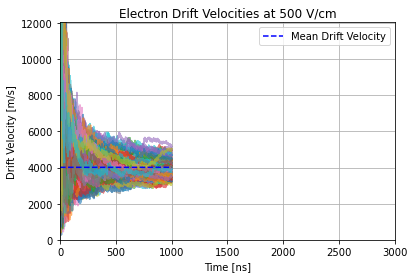

1000


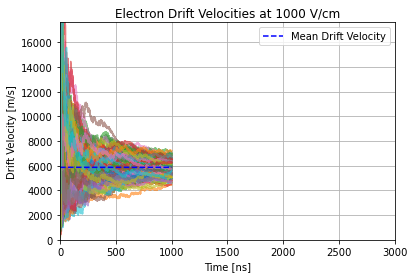

3000


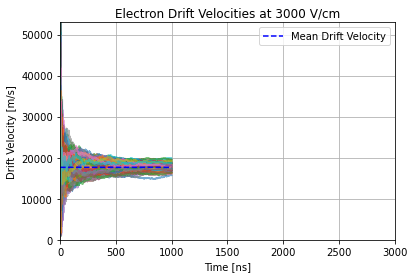

5000


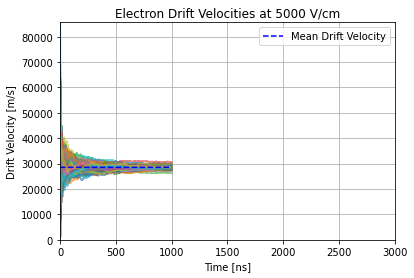

10000


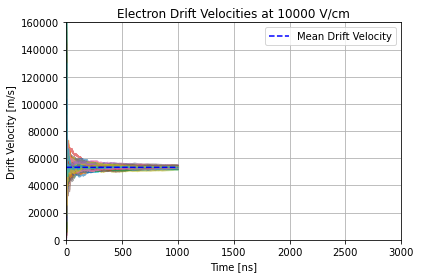

30000


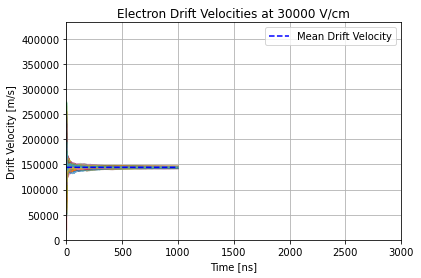

50000


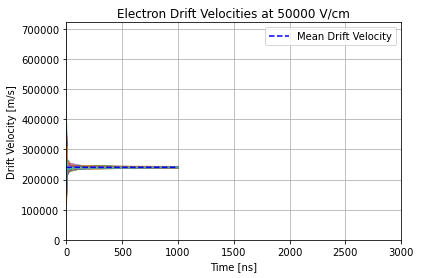

In [5]:
eVs_all = []
bincentres = 0

simulation_v = []

for key, value in sorted(file_tree.items()):
    print(key)
    group = Graph(value)
    #time, vel = self.t, self.drift
    time, vel = group.t, group.drift
    ke = group.ke
    
    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(6, 6))
    
    plt.title(f'Electron Drift Velocities at {key} V/cm')
    plt.xlabel('Time [ns]')
    plt.ylabel('Drift Velocity [m/s]')
    
    for i, t in enumerate(time):
        plt.plot(t, vel[i], alpha=0.6)
        
    MIN = 0
    MAX = 3000
    
    #theory = mobility(key * 1e-3) * (key * 1e-2)
    
    driftvel = group.drift_mean()
    #theory_v.append(theory)
    
    plt.plot(time[0], np.full(len(time[0]), driftvel), 'b--', label='Mean Drift Velocity')
    #plt.plot([MIN,MAX], [theory, theory], 'r--', label='Data from [6]')
    plt.xlim(MIN,MAX)
    #plt.ylim(0,theory*2)
    plt.ylim(0,driftvel*3)
    
    simulation_v.append(driftvel)
    
    max_ev = np.amax([np.amax(k) for k in ke])
    
    bin_list = np.linspace(0, 2.6, 100)
    H, bins = np.histogram(ke[0], bins=bin_list, density=True)
    
    for i in range(group.n - 1):
        H_, bins_ = np.histogram(ke[i + 1], bins=bin_list, density=True)
        H += H_
        
        
    bincentres = [(bins[i] + bins[i + 1]) / 2. for i in range(len(bins) - 1)]
    eVs_all.append(H)

    plt.grid()
    plt.legend()
    plt.show()
    
    # plt.savefig(f'lar_drift_vel_{key}.pdf', bbox_inches='tight')

The below cells plots mean electron energy across different pressures. As the $x$-axis is normalized with respect to pressure, all three plots should coincide. The data is taken from V. Puech and L. Torchin. Collision cross sections and electron swarm parameters in argon. Journal of Physics D: Applied Physics, 19(12):2309–2323, Dec 1986.

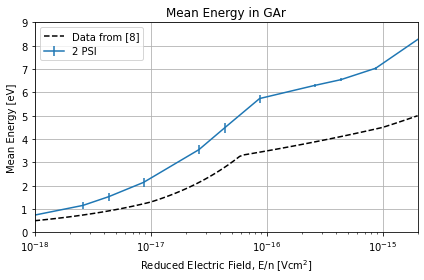

In [6]:
x = [1e-18, 1e-17, 6e-17, 1e-15, 2e-15]
y = [0.5, 1.3, 3.3, 4.5, 5]

data = log_interp1d(x, y)
x_vs = np.logspace(-18, np.log10(2e-15), 100)

# plt.rcParams['font.size'] = 14
# plt.rcParams['font.family'] = 'serif'
# fig = plt.figure(figsize=(6, 6))

plt.plot(x_vs, data(x_vs), 'k--', label='Data from [8]')

for i, p in enumerate(P_v):
    plt.errorbar([E / N_v[i] for E in E_vals[i]], eV_vals[i], yerr=eV_devs[i], label=f'{p} PSI')

plt.xlabel('Reduced Electric Field, E/n [Vcm$^2$]')
plt.ylabel('Mean Energy [eV]')

plt.xscale('log')
plt.xlim(1e-18, 2e-15)
plt.ylim(0, 9)

plt.title(f'Mean Energy in GAr')

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# plt.savefig(f'gar_energy.pdf', bbox_inches='tight')

The below cells plots mean electron drift velocity across different pressures. As the $x$-axis is normalized with respect to pressure, all three plots should coincide. The data is taken from V. Puech and L. Torchin. Collision cross sections and electron swarm parameters in argon. Journal of Physics D: Applied Physics, 19(12):2309–2323, Dec 1986.

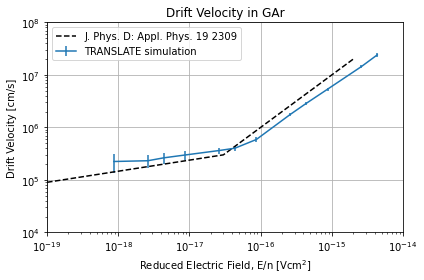

In [10]:
x = [1e-19, 3e-17, 2e-15]
y = [9e4, 3e5, 2e7]

data = log_interp1d(x, y)
x_vs = np.logspace(-19, np.log10(2e-15), 100)

# plt.rcParams['font.size'] = 14
# plt.rcParams['font.family'] = 'serif'
#fig = plt.figure(figsize=(8, 6))

plt.plot(x_vs, data(x_vs), 'k--', label='J. Phys. D: Appl. Phys. 19 2309')

for i, p in enumerate(P_v):
        plt.errorbar([E / N_v[i] for E in E_vals[i]], [v * 1e2 for v in v_vals[i]], yerr=[v * 1e2 for v in v_devs[i]], label=f'TRANSLATE simulation')

plt.xlabel('Reduced Electric Field, E/n [Vcm$^2$]')
plt.ylabel('Drift Velocity [cm/s]')
plt.title(f'Drift Velocity in GAr')

plt.xscale('log')
plt.yscale('log')
#plt.xlim(1e-19, 1e-14)
#plt.ylim(1e4, 1e8)

plt.xlim(1e-19, 1e-14)
plt.ylim(1e4, 10e7)


plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(f'plots/gar_driftvel.pdf', dpi=250)
plt.show()

# plt.savefig(f'gar_drift.pdf', bbox_inches='tight')